In [3]:
from google.colab import files
uploaded = files.upload()

Saving 2018.csv to 2018 (1).csv
Saving 2019.csv to 2019.csv
Saving report_2018-2019.csv to report_2018-2019.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [6]:
df1= pd.read_csv("2018.csv")
df2= pd.read_csv("2019.csv")
df3= pd.read_csv("report_2018-2019.csv")

In [7]:
df1.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [8]:
df2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
df3.head()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [10]:
print(df1.columns)
print("nn")
print(df2.columns)
print("nn")
print(df3.columns)
print("nn")

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
nn
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
nn
Index(['Overall rank', 'Country or region', 'Year', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
nn


In [11]:
print("Number of null or missing values in 2018 report: ",df1.isnull().sum().sum())
print("Number of null or missing values in 2018 report: ",df2.isnull().sum().sum())
print("Number of null or missing values in consolidated report 2018-2019: ",df3.isnull().sum().sum())

Number of null or missing values in 2018 report:  0
Number of null or missing values in 2018 report:  0
Number of null or missing values in consolidated report 2018-2019:  0


HEATMAPS

<Axes: >

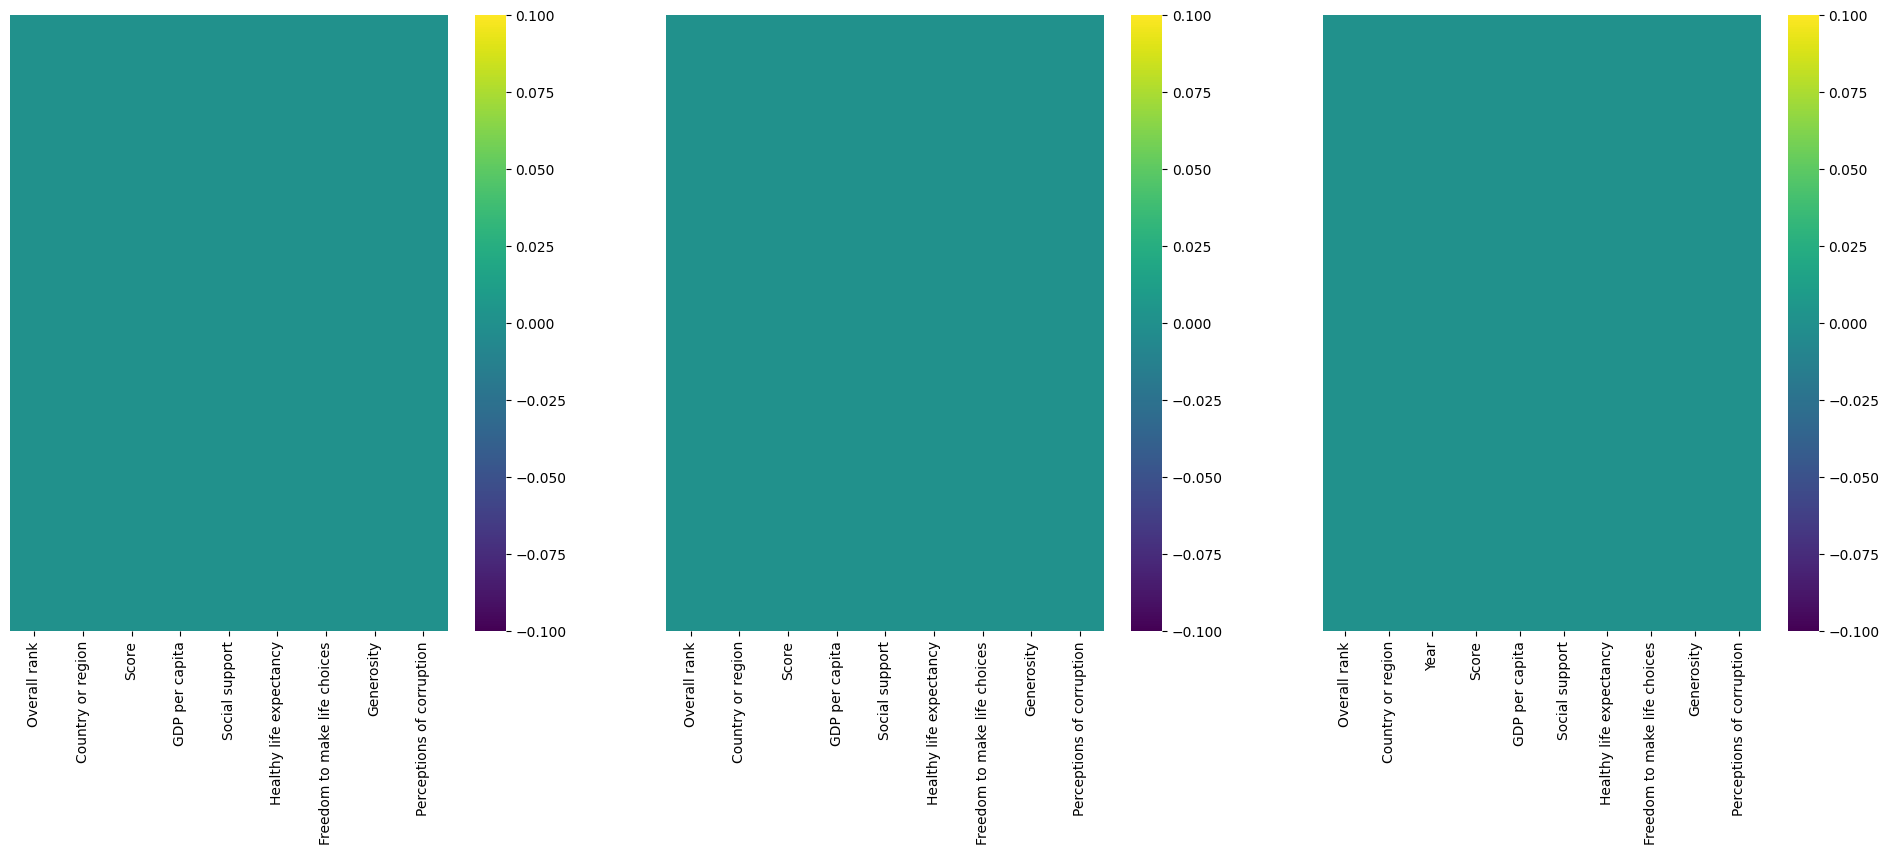

In [39]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
sns.heatmap(df1.isnull(), yticklabels=False, cmap = "viridis")
plt.subplot(1,3,2)
sns.heatmap(df2.isnull(), yticklabels=False, cmap = "viridis")
plt.subplot(1,3,3)
sns.heatmap(df3.isnull(), yticklabels=False, cmap = "viridis")

In [13]:
print("No. of countries ranked in 2018: ", len(df1))
print("No. of countries ranked in 2019: ", len(df2))

No. of countries ranked in 2018:  156
No. of countries ranked in 2019:  156


BARPLOTS

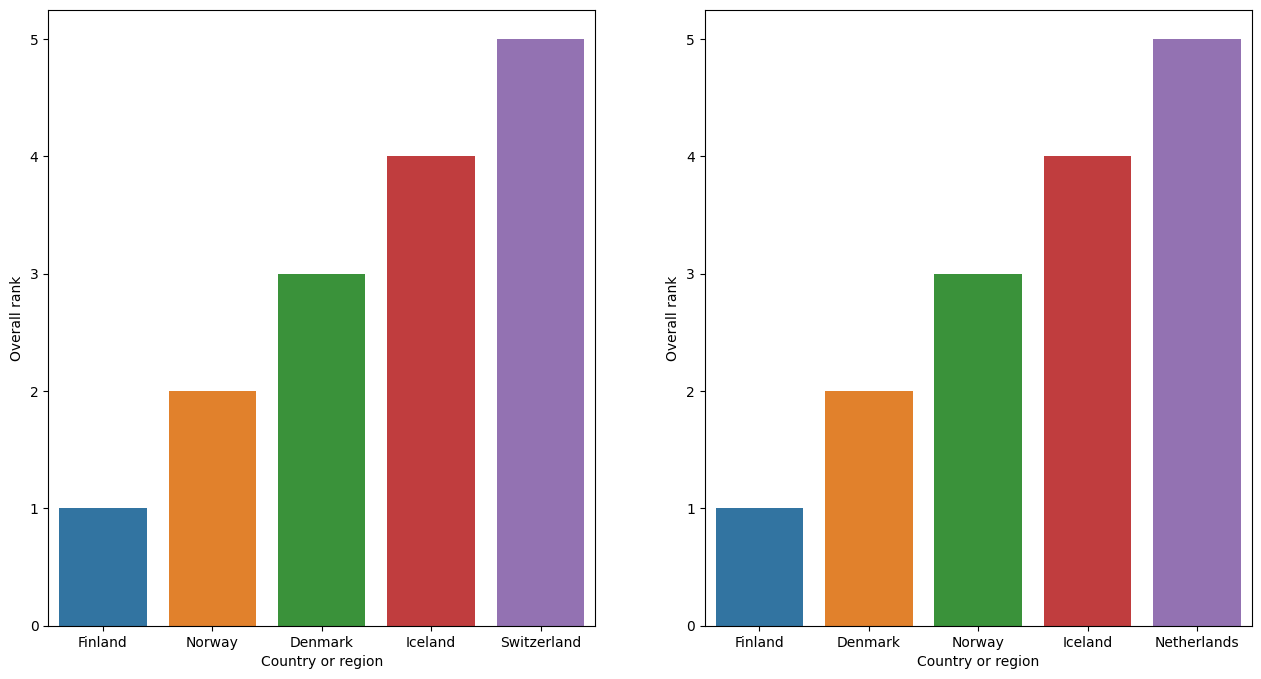

In [14]:
plt.figure(figsize=(24, 8))
plt.subplot(1,3,1)
sns.barplot(x=df1['Country or region'][0:5], y=df1['Overall rank'][0:5])
plt.savefig("Country_vs_rank.png")

plt.subplot(1,3,2)
sns.barplot(x=df2['Country or region'][0:5], y=df2['Overall rank'][0:5])
plt.savefig("Country_vs_rank.png")

In [16]:
print("Average happiness score of Finland in 2018 is ", (df1['Score'].iat[0]+df1['Score'].iat[0])/2)
print("Average happiness score of Finland in 2019 is ", (df2['Score'].iat[0]+df2['Score'].iat[0])/2)

Average happiness score of Finland in 2018 is  7.632
Average happiness score of Finland in 2019 is  7.769


In [17]:
print("Most unphappiest Country in 2018: ", df1['Country or region'].iat[-1], "(", df1['Score'].iat[-1], ')')
print("Most unphappiest Country in 2018: ", df2['Country or region'].iat[-1], "(", df2['Score'].iat[-1], ')')

Most unphappiest Country in 2018:  Burundi ( 2.905 )
Most unphappiest Country in 2018:  South Sudan ( 2.853 )


SCATTERPLOTS

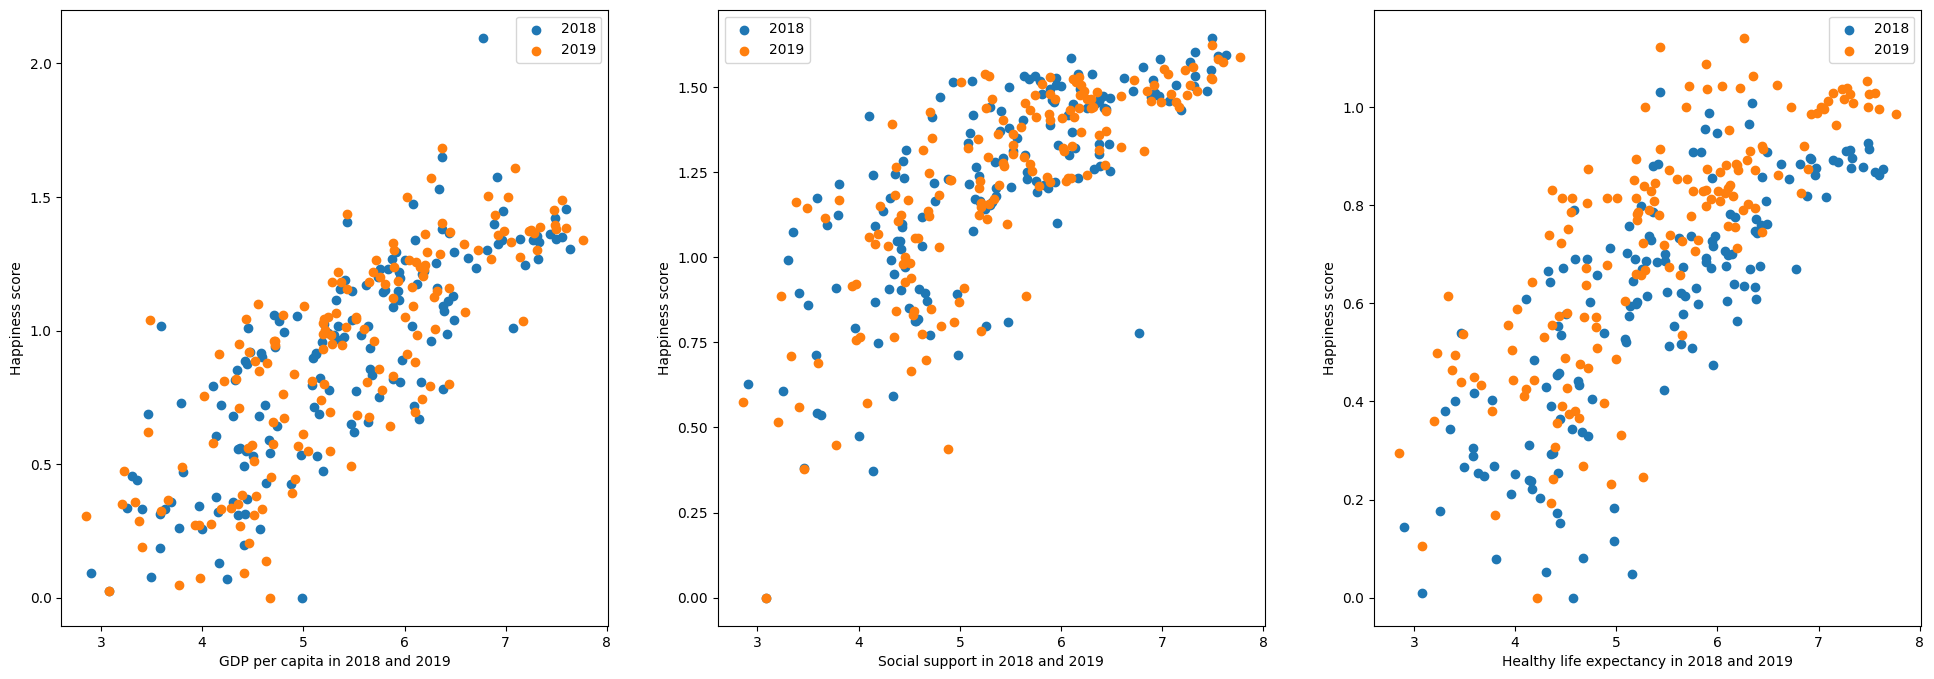

In [23]:
#Analysis of relations among the happiness factors 

plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.scatter( df1['Score'], df1['GDP per capita'])
plt.scatter( df2['Score'], df2['GDP per capita'])
plt.xlabel('GDP per capita in 2018 and 2019')
plt.ylabel('Happiness score')
plt.legend(['2018', '2019'])

plt.subplot(1,3,2)
plt.scatter( df1['Score'], df1['Social support'])
plt.scatter( df2['Score'], df2['Social support'])
plt.xlabel('Social support in 2018 and 2019')
plt.ylabel('Happiness score')
plt.legend(['2018', '2019'])

plt.subplot(1,3,3)
plt.scatter( df1['Score'], df1['Healthy life expectancy'])
plt.scatter( df2['Score'], df2['Healthy life expectancy'])
plt.xlabel('Healthy life expectancy in 2018 and 2019')
plt.ylabel('Happiness score')
plt.legend(['2018', '2019'])

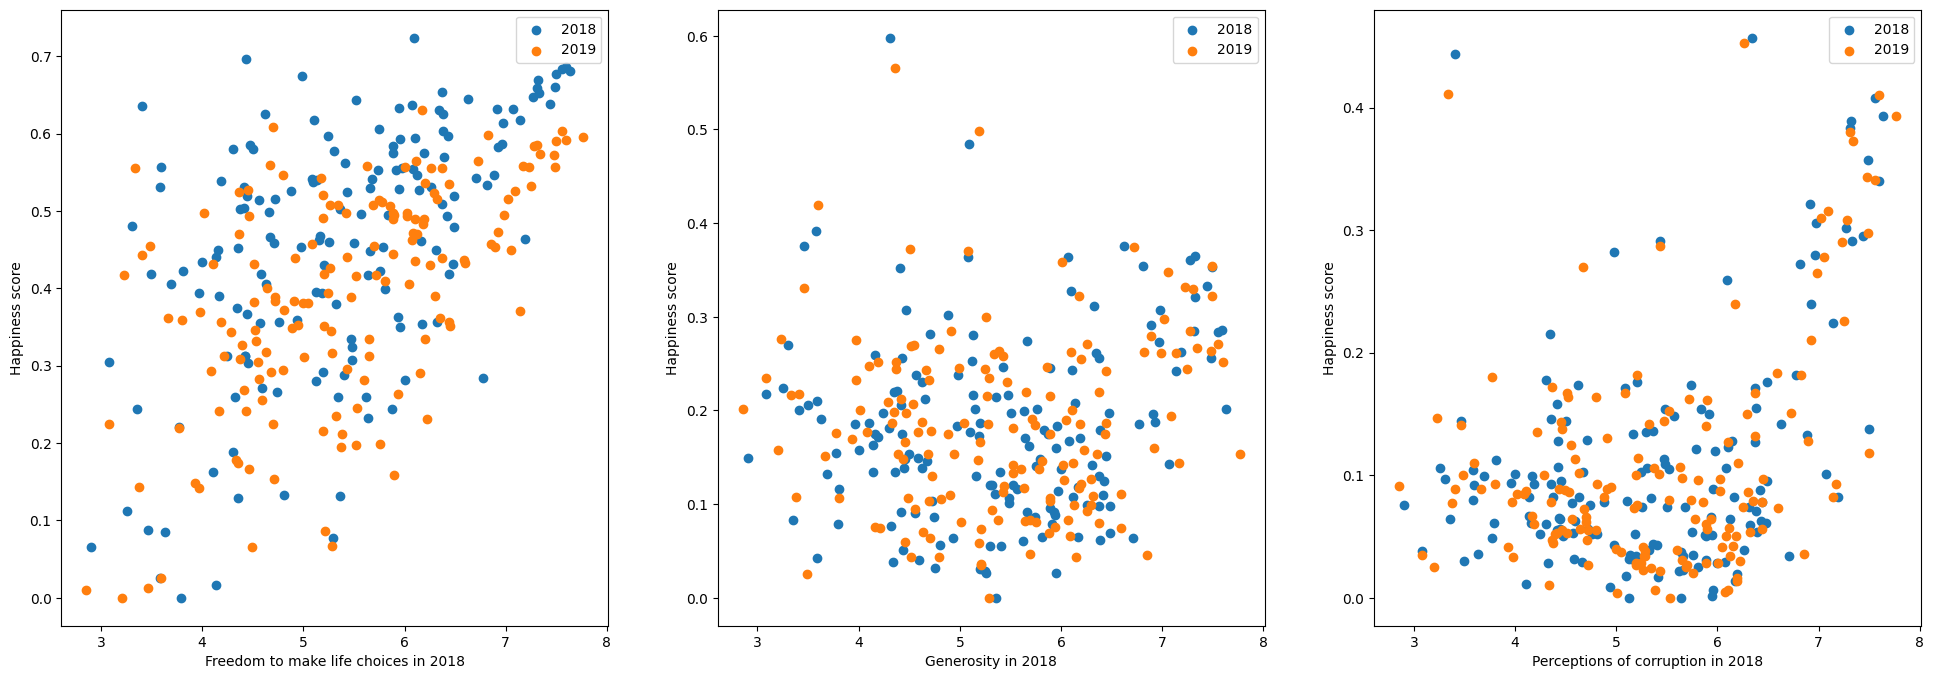

In [24]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.scatter( df1['Score'], df1['Freedom to make life choices'])
plt.scatter( df2['Score'], df2['Freedom to make life choices'])
plt.xlabel('Freedom to make life choices in 2018')
plt.ylabel('Happiness score')
plt.legend(['2018', '2019'])

plt.subplot(1,3,2)
plt.scatter( df1['Score'], df1['Generosity'])
plt.scatter( df2['Score'], df2['Generosity'])
plt.xlabel('Generosity in 2018')
plt.ylabel('Happiness score')
plt.legend(['2018', '2019'])

plt.subplot(1,3,3)
plt.scatter( df1['Score'], df1['Perceptions of corruption'])
plt.scatter( df2['Score'], df2['Perceptions of corruption'])
plt.xlabel('Perceptions of corruption in 2018')
plt.ylabel('Happiness score')
plt.legend(['2018', '2019'])

In [25]:
print(df1.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


LINEAR REGRESSION USING SCATTERPLOT

In [26]:
#linear regression model for year 2018
import pandas as pd
import statsmodels.api as sm

# Define independent and dependent variables
X = df1[['Overall rank', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df1['Score']

# Fit linear regression model
X = sm.add_constant(X) # Add intercept term
lin_reg = sm.OLS(y, X).fit()

# Print results
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1523.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          1.84e-134
Time:                        07:01:36   Log-Likelihood:                 96.219
No. Observations:                 156   AIC:                            -176.4
Df Residuals:                     148   BIC:                            -152.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

The regression model indicates that the independent variables, namely GDP per capita, social support, freedom to make life choices, generosity, and perceptions of corruption, significantly influence the dependent variable, which is the Happiness Index Score. This finding suggests that variations in the aforementioned independent variables can considerably affect the level of happiness in a given population.

It is worth noting that all the independent variables have p-values less than 0.05, indicating that they are statistically significant in the model. Additionally, the adjusted R squared value of 0.986 is indicative of a robust model, which can explain 98.6% of the variance in the dependent variable.

Moreover, the p-value associated with the F statistics is also less than 0.05, further strengthening the evidence that the model is significant and capable of producing reliable results. Overall, these findings suggest that the regression model is valid and can be used to make accurate predictions about the Happiness Index Score based on the selected independent variables.



In [27]:
#linear regression model for year 2019
import pandas as pd
import statsmodels.api as sm

# Define independent and dependent variables
X = df2[['Overall rank', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df2['Score']

# Fit linear regression model
X = sm.add_constant(X) # Add intercept term
lin_reg = sm.OLS(y, X).fit()

# Print results
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1133.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          3.97e-125
Time:                        07:02:52   Log-Likelihood:                 74.445
No. Observations:                 156   AIC:                            -132.9
Df Residuals:                     148   BIC:                            -108.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

A regression analysis was conducted to investigate the influence of social support, freedom to make life choices, generosity, and perceptions of corruption on the happiness index score. The analysis revealed that all independent variables significantly influenced the dependent variable, indicating that the happiness index score varied greatly based on these factors. The statistical significance of these variables was confirmed by a p-value of less than 0.05. The robustness of the model was also demonstrated by an adjusted R squared value of 0.981. Moreover, the p-value associated with F statistics was less than 0.05, suggesting that the model was good. These findings suggest that policymakers and organizations could target these independent variables to enhance overall happiness levels.

SCATTERPLOT

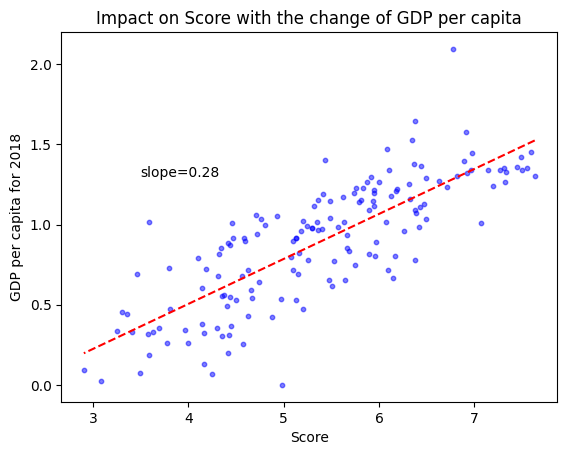

In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1.1 Happiness vs GDP per capita for 2018
plt.scatter(df1['Score'], df1['GDP per capita'], s=10, c='blue', alpha=0.5)
z = np.polyfit(df1['Score'], df1['GDP per capita'], 1)
p = np.poly1d(z)
plt.plot(df1['Score'], p(df1['Score']), "r--")
plt.annotate("slope={:.2f}".format(z[0]), xy=(3.5, 1.3), xytext=(3.5, 1.3))
plt.title("Impact on Score with the change of GDP per capita")
plt.xlabel("Score")
plt.ylabel("GDP per capita for 2018")
plt.show()

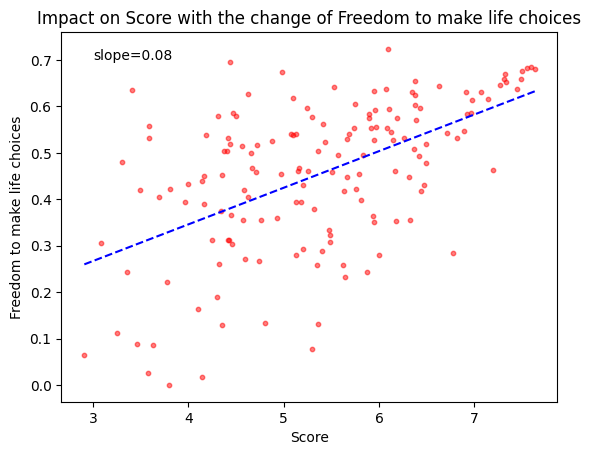

In [29]:
# 2.1 Happiness vs Freedom to make life choices for 2018
plt.scatter(df1['Score'], df1['Freedom to make life choices'], s=10, c='red', alpha=0.5)
z = np.polyfit(df1['Score'], df1['Freedom to make life choices'], 1)
p = np.poly1d(z)
plt.plot(df1['Score'], p(df1['Score']), "b--")
plt.annotate("slope={:.2f}".format(z[0]), xy=(3, 0.7), xytext=(3, 0.7))
plt.title("Impact on Score with the change of Freedom to make life choices")
plt.xlabel("Score")
plt.ylabel("Freedom to make life choices")
plt.show()


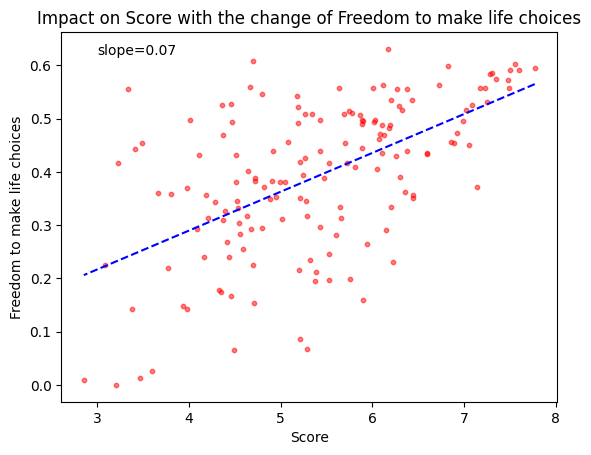

In [30]:
# 2.2 Happiness vs Freedom to make life choices for 2019
plt.scatter(df2['Score'], df2['Freedom to make life choices'], s=10, c='red', alpha=0.5)
z = np.polyfit(df2['Score'], df2['Freedom to make life choices'], 1)
p = np.poly1d(z)
plt.plot(df2['Score'], p(df2['Score']), "b--")
plt.annotate("slope={:.2f}".format(z[0]), xy=(3, 0.62), xytext=(3, 0.62))
plt.title("Impact on Score with the change of Freedom to make life choices")
plt.xlabel("Score")
plt.ylabel("Freedom to make life choices")
plt.show()

BARPLOT

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

def country_comp1(country1: str, country2: str, cols1: list) -> tuple:
    """
    Creates a comparison plot between two countries using a selected set of columns from the dataframe df1.
    
    Parameters:
    country1 (str): name of the first country to be compared
    country2 (str): name of the second country to be compared
    cols1 (list): list of column names to be used in the comparison plot
    
    Returns:
    tuple: a tuple of two axes objects containing the comparison plot for each country
    """
    df4 = df1[df1['Country or region'].isin([country1, country2])]
    df4 = df4[cols1].T
    df4.columns = [country1, country2]
    print(df4)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10), gridspec_kw={'wspace': 0})
    fig.suptitle(f"Comparison {country1} and {country2}", family='Serif', weight='bold', size=20)
    sns.barplot(data=df4, y=df4.index, x=country1, color='#ffa600', ax=ax1)
    sns.barplot(data=df4, y=df4.index, x=country2, color='#003f5c', ax=ax2)
    ax1.invert_xaxis()
    for ax in [ax1, ax2]:
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    ax2.yaxis.tick_right()
    return ax1, ax2

                              Finland  India
GDP per capita                  1.305  0.721
Social support                  1.592  0.747
Healthy life expectancy         0.874  0.485
Freedom to make life choices    0.681  0.539
Generosity                      0.202  0.172
Perceptions of corruption       0.393  0.093


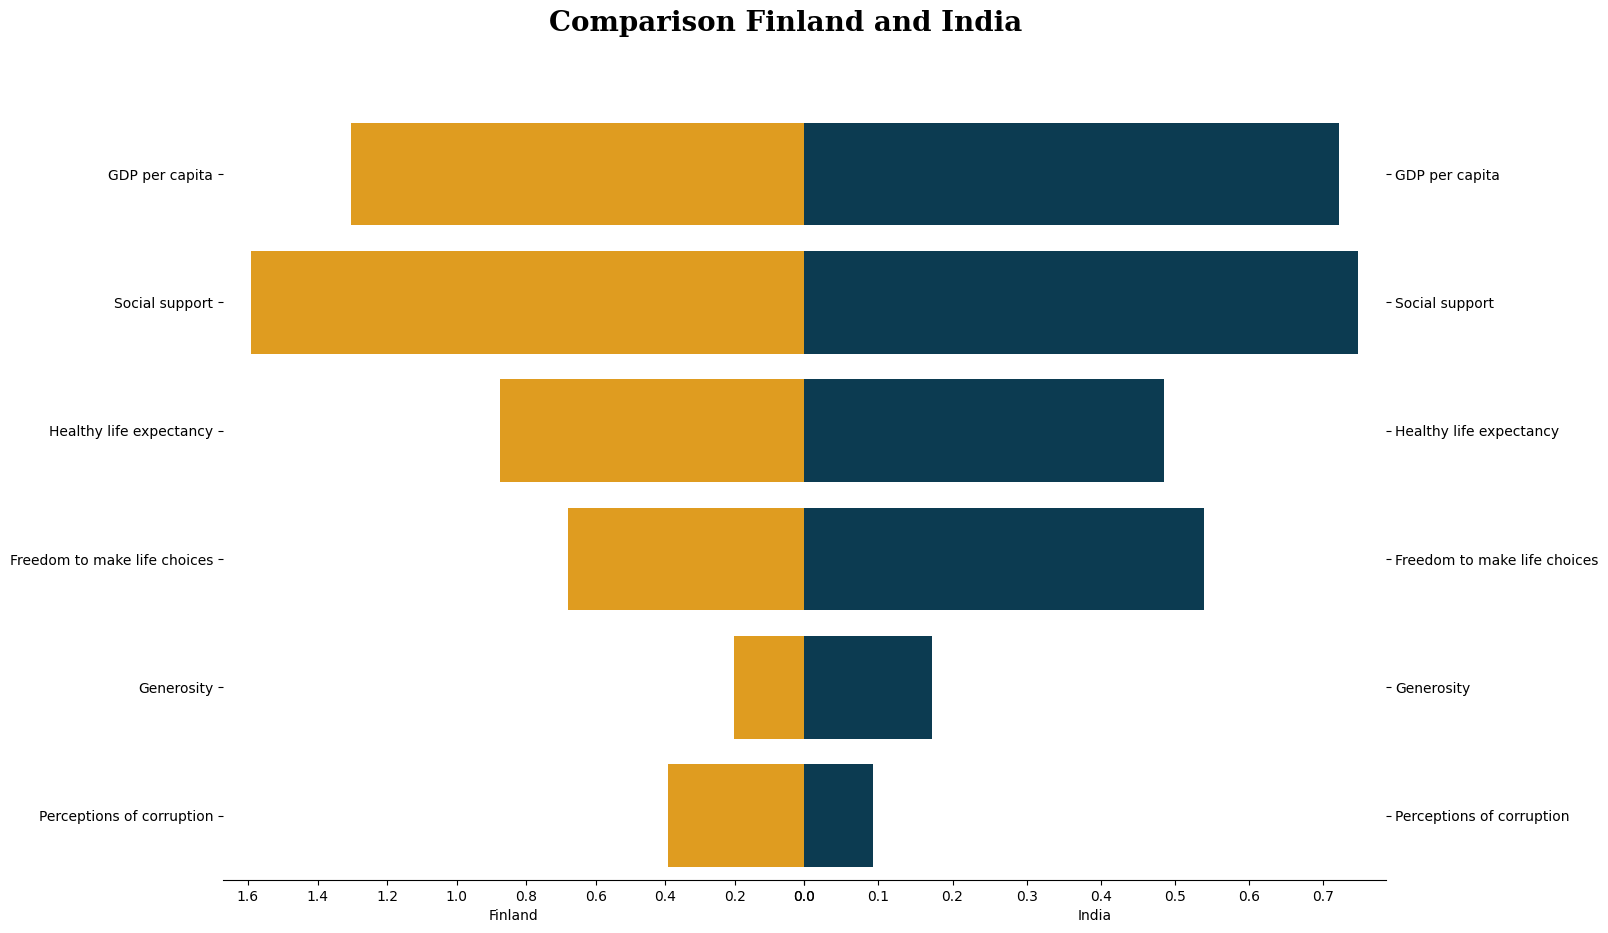

In [33]:
# example usage
cols_to_use = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
ax1, ax2 = country_comp1('Finland', 'India', cols_to_use)
plt.show()

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

def country_comp2(country1: str, country2: str, cols1: list) -> tuple:
    """
    Creates a comparison plot between two countries using a selected set of columns from the dataframe df1.
    
    Parameters:
    country1 (str): name of the first country to be compared
    country2 (str): name of the second country to be compared
    cols1 (list): list of column names to be used in the comparison plot
    
    Returns:
    tuple: a tuple of two axes objects containing the comparison plot for each country
    """
    df5 = df2[df2['Country or region'].isin([country1, country2])]
    df5 = df5[cols1].T
    df5.columns = [country1, country2]
    print(df5)
    fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(15, 10), gridspec_kw={'wspace': 0})
    fig.suptitle(f"Comparison {country1} and {country2}", family='Serif', weight='bold', size=20)
    sns.barplot(data=df5, y=df5.index, x=country1, color='#ffa600', ax=ax3)
    sns.barplot(data=df5, y=df5.index, x=country2, color='#003f5c', ax=ax4)
    ax3.invert_xaxis()
    for ax in [ax3, ax4]:
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    ax4.yaxis.tick_right()
    return ax3, ax4

                              Finland  India
GDP per capita                  1.340  0.755
Social support                  1.587  0.765
Healthy life expectancy         0.986  0.588
Freedom to make life choices    0.596  0.498
Generosity                      0.153  0.200
Perceptions of corruption       0.393  0.085


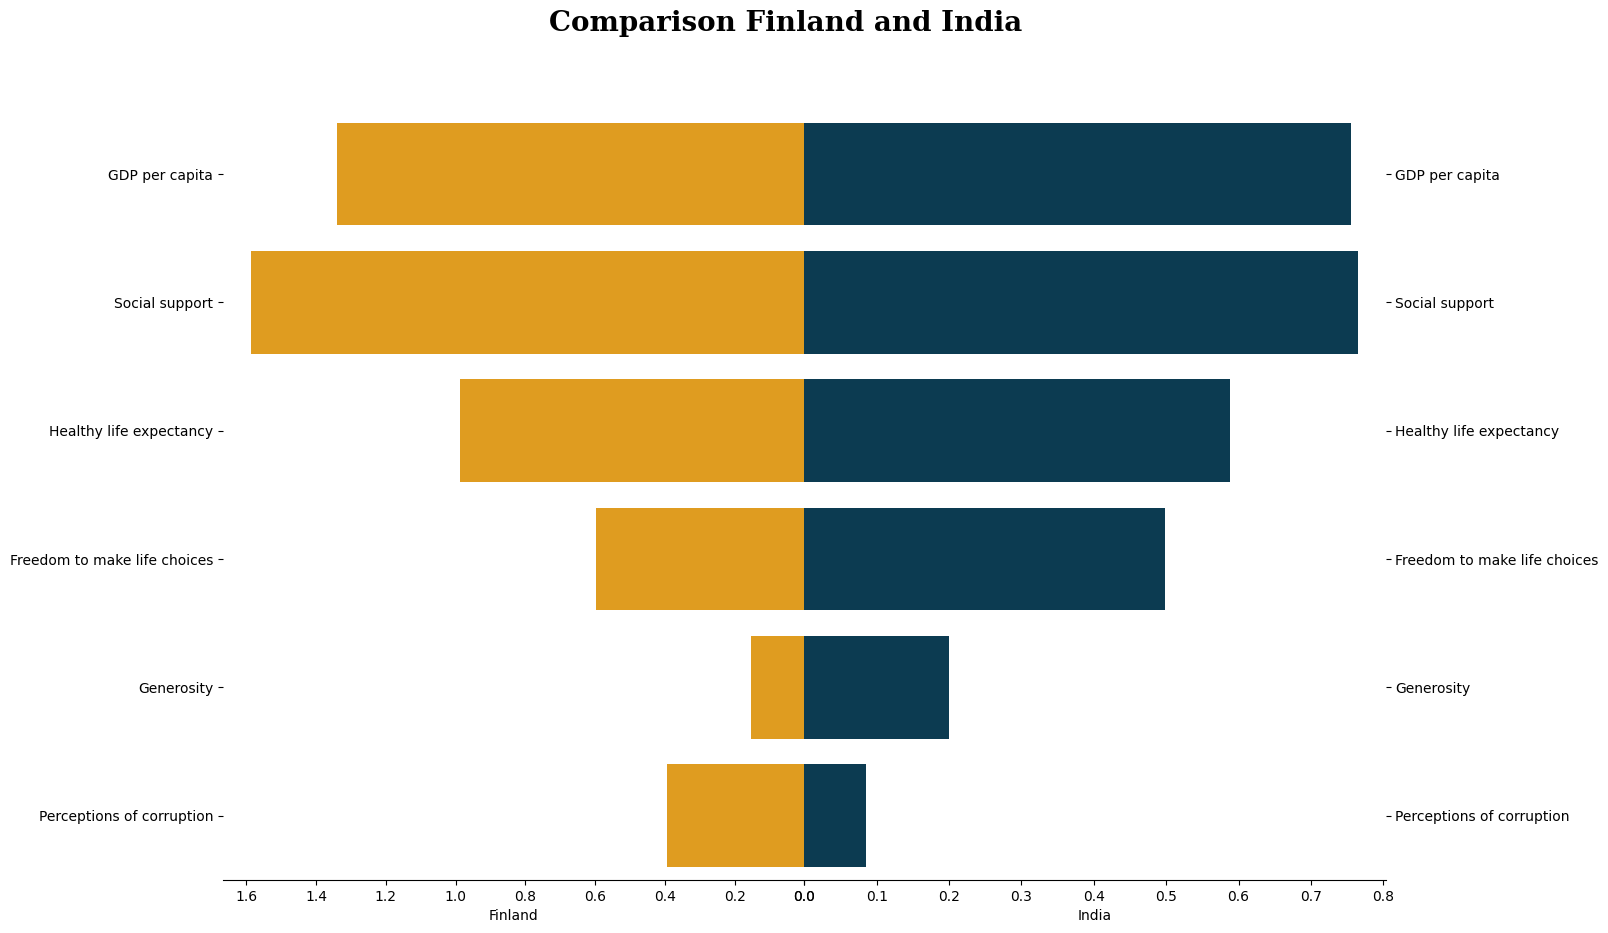

In [35]:
# example usage
cols_to_use = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
ax3, ax4 = country_comp2('Finland', 'India', cols_to_use)
plt.show()


In [36]:
df3.head()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [37]:
print(df3.columns)

Index(['Overall rank', 'Country or region', 'Year', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


LINEPLOT

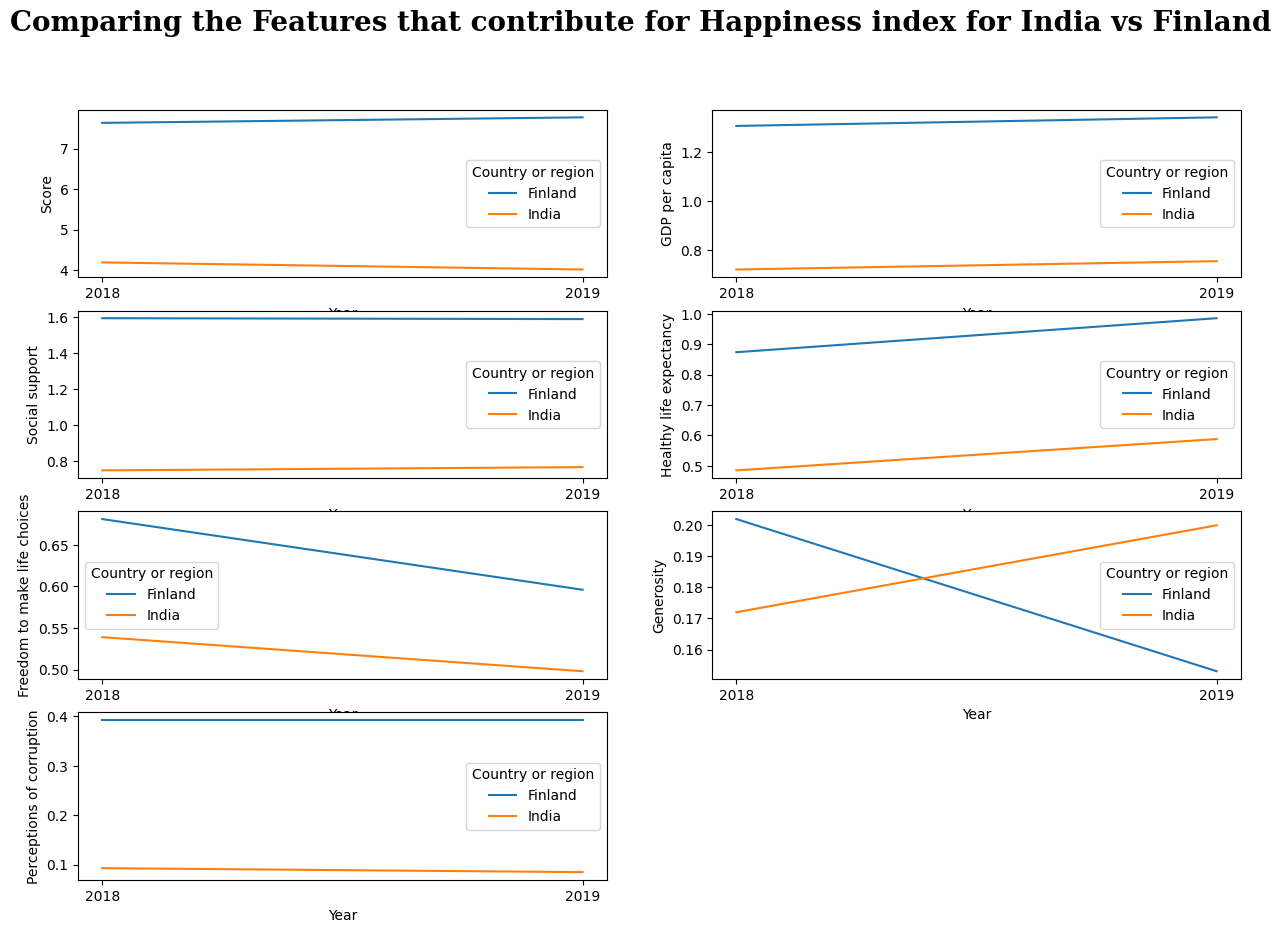

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

def comp_country(country1, country2, df3):
    cols = df3[['Year', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
    df3 = df3[df3['Country or region'].isin([country1,country2])]
    df3['Year'] = df3['Year'].astype(int)  # Convert Year column to integer
    fig = plt.figure(figsize=(15,10))
    plt.suptitle("Comparing the Features that contribute for Happiness index for {} vs {}".format(country1, country2), family='Serif', weight='bold', size=20)
    j = 0 
    color = sns.color_palette("husl", 2)
    for i in cols.columns[1:]:
        ax = plt.subplot(421+j)
        try:
            sns.lineplot(data=df3, x='Year', y=i, hue='Country or region', color=color[-2])
            ax.set_xticks(df3['Year'].unique())  # Set x-axis ticks to unique integer values in Year column
            j += 1
        except Exception as e:
            print(f"Error occurred while plotting {i}: {str(e)}")
    plt.show()
    return


comp_country('India', 'Finland', df3)
